# Project: Investigate a TMDB 5000 Movie Dataset
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


This dataset was taken from The Movie Database(TMDb), "a community built movie and TV database." (www.themoviedb.org/about) Each row corresponds to a movie and includes a range of data about file. Relevant data to be used in the following analysis include the following variables : 

- id                   
- imdb_id              
- popularity           
- budget               
- revenue              
- original_title       
- cast                 
- homepage             
- director             
- tagline              
- keywords             
- overview             
- runtime              
- genres               
- production_companies 
- release_date         
- vote_count           
- vote_average         
- release_year         
- budget_adj(budget in terms of 2010 dollars)           
- revenue_adj (revenue in terms of 2010 dollars)   


 
In this report, I explore the following questions : 

1. Which movie was the most popular in each decade?
2. Which movie earned the most revenue compared to budget?
3. Which genre of movie got the highest or lowest vote average? 
4. Is a certain month of release date associated with higer revunue or higer vote average?

In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head(10)

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   
5  281957  tt1663202    9.110700  135000000   532950503   
6   87101  tt1340138    8.654359  155000000   440603537   
7  286217  tt3659388    7.667400  108000000   595380321   
8  211672  tt2293640    7.404165   74000000  1156730962   
9  150540  tt2096673    6.326804  175000000   853708609   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   
5                  The Revenant   
6            Terminator Genisys   
7                   The Martian   
8                       Minions   
9                    Inside Out   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
5  Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...   
6  Arnold Schwarzenegger|Jason Clarke|Emilia Clar...   
7  Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...   
8  Sandra Bullock|Jon Hamm|Michael Keaton|Allison...   
9  Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...   

                                            homepage  \
0                      http://www.jurassicworld.com/   
1                        http://www.madmaxmovie.com/   
2     http://www.thedivergentseries.movie/#insurgent   
3  http://www.starwars.com/films/star-wars-episod...   
4                           http://www.furious7.com/   
5       http://www.foxmovies.com/movies/the-revenant   
6                    http://www.terminatormovie.com/   
7        http://www.foxmovies.com/movies/the-martian   
8                       http://www.minionsmovie.com/   
9                http://movies.disney.com/inside-out   

                         director  \
0                 Colin Trevorrow   
1                   George Miller   
2                Robert Schwentke   
3                     J.J. Abrams   
4                       James Wan   
5  Alejandro GonzÃ¡lez IÃ±Ã¡rritu   
6                     Alan Taylor   
7                    Ridley Scott   
8        Kyle Balda|Pierre Coffin   
9                     Pete Docter   

                                           tagline  ...  \
0                                The park is open.  ...   
1                               What a Lovely Day.  ...   
2                       One Choice Can Destroy You  ...   
3                    Every generation has a story.  ...   
4                              Vengeance Hits Home  ...   
5  (n. One who has returned, as if from the dead.)  ...   
6                                 Reset the future  ...   
7                                   Bring Him Home  ...   
8     Before Gru, they had a history of bad bosses  ...   
9         Meet the little voices inside your head.  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   
5  In the 1820s, a frontiersman, Hugh Glass, sets...     156   
6  The year is 2029. John Connor, leader of the r...     125   
7  During a manned mission to Mars, Astronaut Mar...     141   
8  Minions Stuart, Kevin and Bob are recruited by...      91   
9  Growing up can be a bumpy road, and 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
#total row counts = 10866
len(df)

10866

## Data Cleaning

### 1. Check Missing Values

In [5]:
# check null values in each columns
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

There are lots of missing values in ***homepage***, ***tagline***, ***keywords*** and ***production_companies*** columns.   
However, as those columns does not have significant information, I would just not remove the missing values using ***dropna()*** function. 

### 2. Dedupe Data

In [6]:
# check if there are duplicated data
df.duplicated().any()

True

In [7]:
# see which row is duplicated
df[df.duplicated()==True]

id    imdb_id  popularity    budget  revenue original_title  \
2090  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast homepage  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

              director              tagline  ...  \
2090  Dwight H. Little  Survival is no game  ...   

                                               overview runtime  \
2090  In the year of 2039, after World Wars destroy ...      92   

                                           genres    production_companies  \
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date vote_count  vote_average  release_year  budget_adj  \
2090      3/20/10        110           5.0          2010  30000000.0   

      revenue_adj  
2090     967000.0  

[1 rows x 21 columns]

There is 1 duplicated data, so let's drop duplicated values using ***drop_duplicates()*** method.    
(Refer to the official document of ***pandas.DataFrame.drop_duplicates()*** method in below link.       https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)

In [8]:
# drop the duplicated row
df.drop_duplicates(inplace=True) #Be sure if you want to replace the df, you should include "inplace=True". 

In [9]:
# check again if there is any duplicated row. 
df.duplicated().any()

False


### 3.  Change data type of ***'release_date'*** column from Object to Datetime

In [10]:
# Check if there is any data with other format than '/'
df['release_date'].str.contains('/').all()

True

In [11]:
# split the "release_date" values into 3 part on the "/" character. 
release_date = df['release_date'].str.split(pat='/', expand=True)
release_date.head()

0   1   2
0   6   9  15
1   5  13  15
2   3  18  15
3  12  15  15
4   4   1  15

Check whether the first two digits stand for Month or Day

In [12]:
# does the first column stand for month? or day? 
(pd.to_numeric(release_date[0])<=12).all()

True

In [13]:
# does the second column stand for month? or day? 
(pd.to_numeric(release_date[1])<=12).all()

False

So, I can guess the date format of the column ***release_date*** is **'MM/DD/YY'**.    

In [14]:
# change the column names into "Month", "Day", "Year" each.
release_date.columns = ['Month', 'Day', 'Year']
release_date.head()

Month Day Year
0     6   9   15
1     5  13   15
2     3  18   15
3    12  15   15
4     4   1   15

In [15]:
# But, not sure if '15' in ***Year*** column means '1915' or '2015'.    
# So I replace the "Year" column with "release_year" column of df. 
release_date['Year'] = df.release_year.astype(str)
release_date.head()

Month Day  Year
0     6   9  2015
1     5  13  2015
2     3  18  2015
3    12  15  2015
4     4   1  2015

As I converted the format of ***Year*** column from 'yy' to 'yyyy', I can finally change the ***release_date*** column to 'mm/dd/yyyy' format by concatenating ***Month***, ***Day***, ***Year*** columns of release_date. 

In [16]:
# change the date format of "release_date" column. 
df.release_date = release_date['Month']+'/'+release_date['Day']+'/'+release_date['Year']
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...     6/9/2015       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...    5/13/2015       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...    3/18/2015       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot   12/15/2015       5292   
4  Universal Pictures|Original Film|Media Rights ...     4/1/2015       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

Now I will convert the data type of ***release_date*** column from **object** to **datetime**. 

I will use __.to_datetime()__ method in pandas. 

In [17]:
# convert the data type of "release_date" from object to datetime
df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%Y', errors='raise')

To check if there is wrong data in ***release_date*** column, I compare the year of ***release_date*** column and the ***release_year*** column.

In [18]:
# check if the year values of "release_date" column matches "release_year" column. 
df[df.release_date.dt.year != df.release_year]

Empty DataFrame
Columns: [id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj]
Index: []

[0 rows x 21 columns]

Finally, I succeed in converting data type of ***release_date*** column from object to datetime. 

### 4. Convert Data Types of 'budget_adj', 'revenue_adj' Columns from Float to Int 

In order to convert float to int, I used **.astype()** method in pandas.

In [19]:
# convert data type of "budget_adj" from float to int
df.budget_adj = df.budget_adj.astype('int64')

In [20]:
df.budget_adj.head()

0    137999939
1    137999939
2    101199955
3    183999919
4    174799923
Name: budget_adj, dtype: int64

In the same way, I convert the data type of 'revenue_adj' column from float to int.

In [21]:
# convert data type of "revenue_adj" from float to int
df.revenue_adj = df.revenue_adj.astype('int64')

In [22]:
df.revenue_adj.head()

0    1392445892
1     348161292
2     271619025
3    1902723129
4    1385748801
Name: revenue_adj, dtype: int64

In [23]:
# check 
df.head(3)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   
2  262500  tt2908446   13.112507  110000000   295238201           Insurgent   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   

                                         homepage          director  \
0                   http://www.jurassicworld.com/   Colin Trevorrow   
1                     http://www.madmaxmovie.com/     George Miller   
2  http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   

                      tagline  ...  \
0           The park is open.  ...   
1          What a Lovely Day.  ...   
2  One Choice Can Destroy You  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18       2480   

   vote_average  release_year  budget_adj  revenue_adj  
0           6.5          2015   137999939   1392445892  
1           7.1          2015   137999939    348161292  
2           6.3          2015   101199955    271619025  

[3 rows x 21 columns]

<a id='eda'></a>
## Exploratory Data Analysis

### Univariate analysis

Firstly, let's do some univariate analysis.  

In [24]:
# vote_average
df.hist(column='vote_average', figsize=(7,5))

array([[<AxesSubplot:title={'center':'vote_average'}>]], dtype=object)

If you look at the histogram above, the ***vote_average*** values are from 0 to 10, and most frequent vote_average was between 4 and 8. 

array([[<AxesSubplot:title={'center':'runtime'}>]], dtype=object)

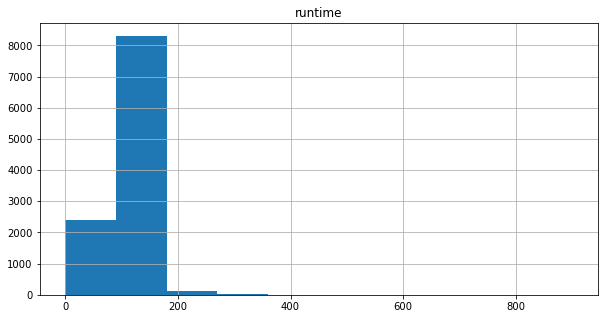

In [25]:
# runtime 
df.hist(column='runtime', figsize=(10,5))

Most of movies' runtime is **under 200 minutes**. 

array([[<AxesSubplot:title={'center':'release_year'}>]], dtype=object)

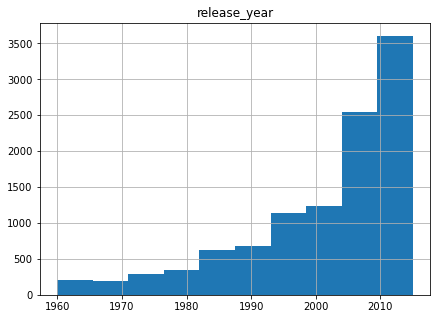

In [26]:
# release_year 
df.hist(column='release_year', figsize=(7,5))

So, I could find that most of movies in the datasets are from **recent decades** of 2000 - 2020. 

### Question 1 : Which movie was the most popular in each decade? 

Firstly, let's find out which movies are the most popular using "popularity" column.   
To find out top 10 values, I used pandas **.nlargest** method. 

In [27]:
# top 10 popular movie
df.nlargest(10, 'popularity').original_title

0                              Jurassic World
1                          Mad Max: Fury Road
629                              Interstellar
630                   Guardians of the Galaxy
2                                   Insurgent
631       Captain America: The Winter Soldier
1329                                Star Wars
632                                 John Wick
3                Star Wars: The Force Awakens
633     The Hunger Games: Mockingjay - Part 1
Name: original_title, dtype: object

So, the most popular movie was *"Jurrasic World"*, and the sencond and third was *"Mad Max: Fury Road"* and *"Interstellar"* each.  

Then, how about the most popular movie in each decade? 
Firstly, I divided the whole data into several groups based on the release_year. 

In [28]:
# first, find out the minimum and maximun value of 'release_year'. 
df.release_year.min(), df.release_year.max()

(1960, 2015)

In [29]:
# split the whole data into each decades using 'release_year' column. 
df_60 = df[df.release_year<1970]
df_70 = df[(df.release_year >= 1970) & (df.release_year<1980)]
df_80 = df[(df.release_year >= 1980) & (df.release_year<1990)]
df_90 = df[(df.release_year >= 1990) & (df.release_year<2000)]
df_00 = df[(df.release_year >= 2000) & (df.release_year<2010)]
df_10 = df[(df.release_year >= 2010) & (df.release_year<2020)]

In [30]:
# append each datasets of each decades into one dataset, which is "df_popular"
df_popular = df_60[df_60.popularity==df_60.popularity.max()]
df_popular = df_popular.append(df_70[df_70.popularity==df_70.popularity.max()])
df_popular = df_popular.append(df_80[df_80.popularity==df_80.popularity.max()])
df_popular = df_popular.append(df_90[df_90.popularity==df_90.popularity.max()])
df_popular = df_popular.append(df_00[df_00.popularity==df_00.popularity.max()])
df_popular = df_popular.append(df_10[df_10.popularity==df_10.popularity.max()])

Lastly, I added *Decade* column in the first place.

In [31]:
# add "Decade" column at index 0 to indicate which decades the movies from. 
df_popular.insert(0, "Decade", ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s'])

So I can find which movie was the most popular in each decade in below.

In [32]:
df_popular

Decade      id    imdb_id  popularity     budget     revenue  \
9719  1960s      62  tt0062622    3.309196   12000000    56715371   
1329  1970s      11  tt0076759   12.037933   11000000   775398007   
6081  1980s     105  tt0088763    6.095293   19000000   381109762   
2409  1990s     550  tt0137523    8.947905   63000000   100853753   
1386  2000s   19995  tt0499549    9.432768  237000000  2781505847   
0     2010s  135397  tt0369610   32.985763  150000000  1513528810   

             original_title  \
9719  2001: A Space Odyssey   
1329              Star Wars   
6081     Back to the Future   
2409             Fight Club   
1386                 Avatar   
0            Jurassic World   

                                                   cast  \
9719  Keir Dullea|Douglas Rain|Gary Lockwood|William...   
1329  Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...   
6081  Michael J. Fox|Christopher Lloyd|Lea Thompson|...   
2409  Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...   
1386  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   
0     Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   

                                               homepage         director  ...  \
9719                                                NaN  Stanley Kubrick  ...   
1329  http://www.starwars.com/films/star-wars-episod...     George Lucas  ...   
6081  http://www.backtothefuture.com/movies/backtoth...  Robert Zemeckis  ...   
2409         http://www.foxmovies.com/movies/fight-club    David Fincher  ...   
1386                        http://www.avatarmovie.com/    James Cameron  ...   
0                         http://www.jurassicworld.com/  Colin Trevorrow  ...   

                                               overview runtime  \
9719  Humanity finds a mysterious object buried bene...     149   
1329  Princess Leia is captured and held hostage by ...     121   
6081  Eighties teenager Marty McFly is accidentally ...     116   
2409  A ticking-time-bomb insomniac and a slippery s...     139   
1386  In the 22nd century, a paraplegic Marine is di...     162   
0     Twenty-two years after the events of Jurassic ...     124   

                                         genres  \
9719          Science Fiction|Mystery|Adventure   
1329           Adventure|Action|Science Fiction   
6081    Adventure|Comedy|Science Fiction|Family   
2409                                      Drama   
1386   Action|Adventure|Fantasy|Science Fiction   
0     Action|Adventure|Science Fiction|Thriller   

                                   production_companies release_date  \
9719  Stanley Kubrick Productions|Metro-Goldwyn-Maye...   1968-04-05   
1329   Lucasfilm|Twentieth Century Fox Film Corporation   1977-03-20   
6081  Universal Pictures|Amblin Entertainment|U-Driv...   1985-07-03   
2409  Regency Enterprises|Fox 2000 Pictures|Taurus F...   1999-10-14   
1386  Ingenious Film Partners|Twentieth Century Fox ...   2009-12-10   
0     Universal Studios|Amblin Entertainment|Legenda...   2015-06-09   

     vote_count vote_average  release_year  budget_adj  revenue_adj  
9719       1708          7.7          1968    75227563    355546597  
1329       4428          7.9          1977    39575591   2789712242  
6081       3785          7.8          1985    38516154    772572771  
2409       5923          8.1          1999    82470329    132022892  
1386       8458          7.1          2009   240886902   2827123750  
0          5562          6.5          2015   137999939   1392445892  

[6 rows x 22 columns]

### Question 2 :Which movie earned the most revenue compared to budget? 

In order to figure out which movie eared the most revenue compared to budget, I divided the ***revenue_adj*** into ***budget_adj*** and keep the value in ***profit_rate(%)*** column.

In [33]:
# revenue_adj divided by budget_adj 
df['profit_rate(%)'] = round(df.revenue_adj / df.budget_adj * 100)
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ... runtime  \
0              The park is open.  ...     124   
1             What a Lovely Day.  ...     120   
2     One Choice Can Destroy You  ...     119   
3  Every generation has a story.  ...     136   
4            Vengeance Hits Home  ...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15       5292   
4  Universal Pictures|Original Film|Media Rights ...   2015-04-01       2947   

  vote_average  release_year  budget_adj  revenue_adj  profit_rate(%)  
0          6.5          2015   137999939   1392445892          1009.0  
1          7.1          2015   137999939    348161292           252.0  
2          6.3          2015   101199955    271619025           268.0  
3          7.5          2015   183999919   1902723129          1034.0  
4          7.3          2015   174799923   1385748801           793.0  

[5 rows x 22 columns]

And now let's find the max value of ***profit_rate(%)*** column. 

In [34]:
df['profit_rate(%)'].max()

inf

The maximum value looks like an infinite value.    
I guess if the value of "budget_adj" is 0, the value of "profit_rate(%)" is infinite.   
Let's check this. 

In [35]:
(df[df['profit_rate(%)'] == np.inf].budget_adj==0).all()

True

In [36]:
# missing "budget_adj" column value
df[df.budget_adj==0].shape[0] # shape[0] : Gives number of rows

5698

In [37]:
# missing "revenue_adj" column value
df[df.revenue_adj==0].shape[0] # shape[0] : Gives number of rows

6016

In total, there are 5696 rows which is missing ***budget_adj*** data and 6016 rows with missing ***revenue_adj*** data.   
In order to exclude those data from the dataset, I will use ***replace()*** method to replace "infinite" values to "NaN".     
(Refer to the official document of ***replace()*** function at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) 

In [38]:
# replace infinite values to NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df['profit_rate(%)']

0        1009.0
1         252.0
2         268.0
3        1034.0
4         793.0
          ...  
10861       NaN
10862       NaN
10863       NaN
10864       NaN
10865       0.0
Name: profit_rate(%), Length: 10865, dtype: float64

In [39]:
df[df['profit_rate(%)'] == df['profit_rate(%)'].max()]

id    imdb_id  popularity  budget    revenue  \
10495  8856  tt0091326    0.772494     113  115103979   

                original_title  \
10495  The Karate Kid, Part II   

                                                    cast homepage  \
10495  Ralph Macchio|Pat Morita|Martin Kove|Charlie T...      NaN   

               director                         tagline  ... runtime  \
10495  John G. Avildsen  This time, the combat is real.  ...     113   

                                      genres  \
10495  Adventure|Drama|Action|Romance|Family   

                                    production_companies release_date  \
10495  Columbia Pictures Corporation|Delphi V Product...   1986-06-18   

      vote_count vote_average  release_year  budget_adj  revenue_adj  \
10495        211          5.8          1986         224    228988593   

       profit_rate(%)  
10495     102227050.0  

[1 rows x 22 columns]

Finally, I found out that the movie with the most revenue compared to budget is **The Karate Kid, Part II** with 102,227,050% of profit rate.

### Question 3 : Which genre of movie got the highest or lowest vote average?

In order to find out that a certain genre of movies is associated with higher vote average, I checked the mean value of ***vote_average*** per each genre. 

In [40]:
# check "vote_average" column's mean
df.groupby(['genres']).vote_average.mean()

genres
Action                                      5.526984
Action|Adventure                            5.333333
Action|Adventure|Animation                  6.775000
Action|Adventure|Animation|Comedy|Drama     5.600000
Action|Adventure|Animation|Comedy|Family    6.100000
                                              ...   
Western|Drama|Crime|Romance                 5.800000
Western|History                             6.000000
Western|History|War                         5.900000
Western|Horror|Thriller                     4.400000
Western|Thriller                            5.700000
Name: vote_average, Length: 2039, dtype: float64

But it seems like most of the movie has several genres at the same time. So I need to divide each genre into each row.   
First let's find the rows with several values in ***genres*** column.

In [42]:
# df[df.genres.str.contains('|')]

The code above returns the _ValueError_. I guess some of the data in ***genres*** column is null or NaN. 

In [43]:
# check how many NaN data is included in "genres" column. 
df[df.genres.isnull()==True].shape[0]

23

So there are 23 rows in total with null / NaN values in ***genres*** column.   
Let's drop the 23 rows from the ***df*** and assign the dataframe to ***df_genre***.

In [44]:
# remove rows with missing value in "genres" column. 
df_genre = df.dropna(subset=['genres'])

In [45]:
# check again for the number of rows with missing values in "genres" column. 
df_genre[df_genre.genres.isnull()==True].shape[0]

0

I am going to take each ***genres*** row and split them into several new rows.   
First, I need to split ***genres*** with delimeter of "|". 

In [46]:
# split the "genres" column on '|'
genre_split = df_genre.genres.str.split('|')

In [47]:
# check
genre_split.head(5)

0    [Action, Adventure, Science Fiction, Thriller]
1    [Action, Adventure, Science Fiction, Thriller]
2            [Adventure, Science Fiction, Thriller]
3     [Action, Adventure, Science Fiction, Fantasy]
4                         [Action, Crime, Thriller]
Name: genres, dtype: object

Then I convert this **genre_split** into a dataframe using *apply()* function. 

In [48]:
# convert the "genre_split" into a dataframe
genre_split = genre_split.apply(lambda x : pd.Series(x))
genre_split.head(10)

0                1                2          3    4
0           Action        Adventure  Science Fiction   Thriller  NaN
1           Action        Adventure  Science Fiction   Thriller  NaN
2        Adventure  Science Fiction         Thriller        NaN  NaN
3           Action        Adventure  Science Fiction    Fantasy  NaN
4           Action            Crime         Thriller        NaN  NaN
5          Western            Drama        Adventure   Thriller  NaN
6  Science Fiction           Action         Thriller  Adventure  NaN
7            Drama        Adventure  Science Fiction        NaN  NaN
8           Family        Animation        Adventure     Comedy  NaN
9           Comedy        Animation           Family        NaN  NaN

Then I use **stack()** method to convert columns into rows.

In [49]:
# convert columns into rows
genre_split = genre_split.stack()
genre_split.head(10)

0  0             Action
   1          Adventure
   2    Science Fiction
   3           Thriller
1  0             Action
   1          Adventure
   2    Science Fiction
   3           Thriller
2  0          Adventure
   1    Science Fiction
dtype: object

There are two indexes, but I only need the level 0 index. I will remove the index level 1. 

※ ***reset_index()***    

    DataFrame.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
    Reset the index, or a level of it.   
    
    - level : If the index has multiple levels, we can specify which level to be resetted
    - drop : The drop parameter to avoid the old index being added as a column
    
   (Refer to the official document of ***reset_index()*** function at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) 

In [50]:
# remove the level 1 index
genre_split = genre_split.reset_index(level=1, drop=True)
genre_split.head(10)

0             Action
0          Adventure
0    Science Fiction
0           Thriller
1             Action
1          Adventure
1    Science Fiction
1           Thriller
2          Adventure
2    Science Fiction
dtype: object

And I changed this Series into Dataframe using *to_frame()* method. 

In [51]:
genre_split = genre_split.to_frame('genre')
genre_split.head(10)

genre
0           Action
0        Adventure
0  Science Fiction
0         Thriller
1           Action
1        Adventure
1  Science Fiction
1         Thriller
2        Adventure
2  Science Fiction

So I finally divided several genres in one row into one genre in each rows.   
As a final step, I merge this dataframe with the original dataframe using **left join**.

In [52]:
df_genre = df.merge(genre_split, left_index=True, right_index=True, how = 'left')
df_genre.head(10)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   
2  262500  tt2908446   13.112507  110000000   295238201           Insurgent   
2  262500  tt2908446   13.112507  110000000   295238201           Insurgent   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   

                                         homepage          director  \
0                   http://www.jurassicworld.com/   Colin Trevorrow   
0                   http://www.jurassicworld.com/   Colin Trevorrow   
0                   http://www.jurassicworld.com/   Colin Trevorrow   
0                   http://www.jurassicworld.com/   Colin Trevorrow   
1                     http://www.madmaxmovie.com/     George Miller   
1                     http://www.madmaxmovie.com/     George Miller   
1                     http://www.madmaxmovie.com/     George Miller   
1                     http://www.madmaxmovie.com/     George Miller   
2  http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
2  http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   

                      tagline  ...                                     genres  \
0           The park is open.  ...  Action|Adventure|Science Fiction|Thriller   
0           The park is open.  ...  Action|Adventure|Science Fiction|Thriller   
0           The park is open.  ...  Action|Adventure|Science Fiction|Thriller   
0           The park is open.  ...  Action|Adventure|Science Fiction|Thriller   
1          What a Lovely Day.  ...  Action|Adventure|Science Fiction|Thriller   
1          What a Lovely Day.  ...  Action|Adventure|Science Fiction|Thriller   
1          What a Lovely Day.  ...  Action|Adventure|Science Fiction|Thriller   
1          What a Lovely Day.  ...  Action|Adventure|Science Fiction|Thriller   
2  One Choice Can Destroy You  ...         Adventure|Science Fiction|Thriller   
2  One Choice Can Destroy You  ...         Adventure|Science Fiction|Thriller   

                                production_companies  release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...    2015-06-09       5562   
0  Universal Studios|Amblin Entertainment|Legenda...    2015-06-09       5562   
0  Universal Studios|Amblin Entertainment|Legenda...    2015-06-09       5562   
0  Universal Studios|Amblin Entertainment|Legenda...    2015-06-09       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...    2015-05-13       6185   
1  Village Roadshow Pictures|Kennedy Miller Produ...    2015-05-13       6185   
1  Village Roadshow Pictures|Kennedy Miller Produ...    2015-05-13       6185   
1  Village Roadshow Pictures|Kennedy Miller Produ...    2015-05-13       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...    2015-03-18       2480   
2  Summit Entertainment|Mandeville F

So let's check the mean of ***vote_average*** group by new ***genre*** column. 

In [53]:
# find the mean of "vote_average"
sr_vote_average = df_genre.groupby(['genre']).vote_average.mean()
sr_vote_average

genre
Action             5.787752
Adventure          5.940585
Animation          6.403147
Comedy             5.905167
Crime              6.124889
Documentary        6.908462
Drama              6.165546
Family             5.997563
Fantasy            5.863537
Foreign            5.981383
History            6.410479
Horror             5.337447
Music              6.480392
Mystery            5.946790
Romance            6.042874
Science Fiction    5.665582
TV Movie           5.788024
Thriller           5.750671
War                6.297778
Western            6.083030
Name: vote_average, dtype: float64

In [54]:
# convert it to dataframe
df_vote_average = sr_vote_average.to_frame('vote_average')
df_vote_average

vote_average
genre                        
Action               5.787752
Adventure            5.940585
Animation            6.403147
Comedy               5.905167
Crime                6.124889
Documentary          6.908462
Drama                6.165546
Family               5.997563
Fantasy              5.863537
Foreign              5.981383
History              6.410479
Horror               5.337447
Music                6.480392
Mystery              5.946790
Romance              6.042874
Science Fiction      5.665582
TV Movie             5.788024
Thriller             5.750671
War                  6.297778
Western              6.083030

So which genre has the highest vote_average and which genre has the lowest vote_average?   
To answer this question, I will use ***idxmax()*** and ***idxmin()*** methods. 

- ***idxmax()*** : Return index of first occurrence of maximum over requested axis.
- ***idxmin()*** : Return index of first occurrence of minimum over requested axis.


In [55]:
# find out the genre with highest vote_average
df_vote_average.idxmax()

vote_average    Documentary
dtype: object

In [56]:
# find out the genre with lowest vote_average
df_vote_average.idxmin()

vote_average    Horror
dtype: object

In [57]:
# make a plot
df_vote_average.plot.bar(ylim=(5,7), ylabel="vote_average", title="The Vote Average of Each Movie Genre", grid=True, figsize=(10,6))

<AxesSubplot:title={'center':'The Vote Average of Each Movie Genre'}, xlabel='genre', ylabel='vote_average'>

As most of the vote_average is between 5-7, I set y axis range using ***ylim=(5,7)***.   

In conlusion, the genre with highest ***vote_average*** is **Documentary** whereas the lowest ***vote_average*** is **Horror**. 

### Question 4 : Is a certain month of release date associated with higer revunue or higer vote average? 

Firstly I add a new column, ***release_month***, and assign month of release date to the column.   
In order to extract month value from the ***release_date*** column of datetime datatype, I use **pd.DatetimeIndex** function. 

In [58]:
# add new column "release_month"
df['release_month'] = pd.DatetimeIndex(df['release_date']).month
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies  release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...    2015-06-09       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...    2015-05-13       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...    2015-03-18       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot    2015-12-15       5292   
4  Universal Pictures|Original Film|Media Rights ...    2015-04-01       2947   

  vote_average release_year  budget_adj  revenue_adj  profit_rate(%)  \
0          6.5         2015   137999939   1392445892          1009.0   
1          7.1         2015   137999939    348161292           252.0   
2          6.3         2015   101199955    271619025           268.0   
3          7.5         2015   183999919   1902723129          1034.0   
4          7.3         2015   174799923   1385748801           793.0   

   release_month  
0              6  
1              5  
2              3  
3             12  
4              4  

[5 rows x 23 columns]

So I got the new column of ***release_month***.   
Now I need to group by the ***vote_average*** and ***revenue*** columns with this ***release_month*** value.

In [59]:
# find mean value of "vote_count" and "release_month" column by "release_month"
df_monthly_vote = df.groupby(df['release_month']).vote_count.mean()
df_monthly_revenue = df.groupby(df['release_month']).revenue.mean()

In [60]:
df_month = pd.concat([df_monthly_vote, df_monthly_revenue], axis=1)

In [61]:
df_month

vote_count       revenue
release_month                          
1              118.260065  1.411151e+07
2              176.756874  2.864513e+07
3              222.121655  3.819337e+07
4              190.067754  3.311576e+07
5              300.019778  6.236695e+07
6              325.535671  7.455935e+07
7              298.519399  5.679878e+07
8              161.847495  2.775356e+07
9              160.182569  1.933244e+07
10             186.946227  2.545855e+07
11             255.291155  5.638361e+07
12             265.556345  5.909834e+07

Finally, to see the result visually, I use **plot.line()** method.   
And I want to see the result respectively so I use **subplots=True** to make seperate subplots for each column. 

Text(0, 0.5, 'revenue')

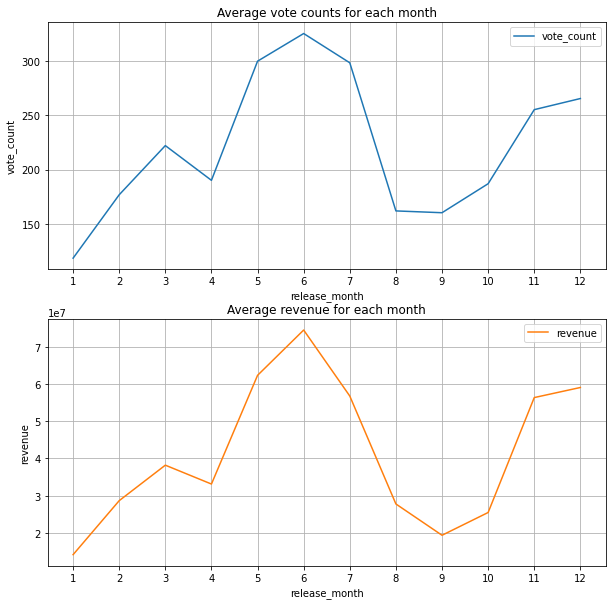

In [62]:
plt = df_month.plot.line(subplots=True, legend=True, title=['Average vote counts for each month', 'Average revenue for each month'], figsize=(10, 10), xticks=range(1,13), sharex=False, grid=True)
plt[0].set_ylabel("vote_count")
plt[1].set_ylabel("revenue")

In conclusion, I could find that the movies which were released during summer or winter time got higher revenue and vote counts. 

<a id='conclusions'></a>
## Conclusions

> **1.** In every decades, I found out which movie got the best vote average. The results are shown in below.    
    - 1960s : 2001: A Space Odyssey   
    - 1970s : Star Wars   
    - 1980s : Back to the Future   
    - 1990s : Fight Club   
    - 2000s : Avatar   
    - 2010s : Jurassic World   

> **2.** I wonder which movie earned the most revenue compared to the budget. So I divide the revenue into budget and the movie with highst profit rate was ***The Karate Kid, Part II*** with 102,227,050% of profit rate.    

>> **Limitations :** There were 5698 data in total of missing ***budget_adj*** column value and 6016 data with missing ***revenue_adj*** column value. I just ignored the those data with 0 but if there were fewer data with missing values, I think the conclusion was more accurate.

> **3.** I wanted to find out which genre of movie got the highest or lowest vote average. So I used groupby function and the results was *Documentary* genre with the higstes vote average, and *Horror* genre with the lowest vote average. 

>> **Limitations :** Most of the ***genre*** column was consist of combining several genres. I splitted those genres on "|" mark for analysis, but I think that it could mislead the conclusion in that the number of genres in one ***genre*** column was different by each movie. For example, if one movie has 5 genres, and the other movie has just 1 genre in ***genre*** column, the 5 different genres were counted 5 times whereas the 1 genre was counted just once. 

>**4.** I wonder if there is any correlation between the month of release date and the success of a movie. So I extracted month value from the **release_date** column and compare the average vote counts and the average revenue by month. The results in two factors were almost similar and it was that a movie which was release in summer or winter got the greater revenue and more vote counts. 